# 🌲 Bagging Regressor

## 🧠 What is Bagging?

**Bagging** (Bootstrap Aggregating) is an ensemble technique that:
- Trains multiple instances of the **same base model**
- On different **bootstrapped samples** of the training data
- And **averages** their predictions (for regression)

---

## Step
Create bootstrapped datasets:

Randomly sample (with replacement) from the training data to create multiple new datasets of the same size.

Train a base learner on each sample:

Fit a model (e.g., a decision tree) to each bootstrapped dataset.

Aggregate the predictions:

For regression: take the average of all predictions.

For classification: use majority vote.


## 📈 Why Use Bagging?

| Advantage         | Explanation                                      |
|------------------|--------------------------------------------------|
| ✅ Reduces variance | Helps stabilize predictions from unstable learners (e.g., decision trees) |
| ✅ Parallelizable  | Each model is trained independently            |
| ❌ Can overfit     | If base models are too complex                 |

---

## 🔧 Typical Base Learner

The most common base learner is a **Decision Tree** — leading to the well-known **Random Forest** when extra randomness is introduced.



## Simulated data

Bagging R²: 0.9290287593882544
Bagging MSE: 0.040843312041062486


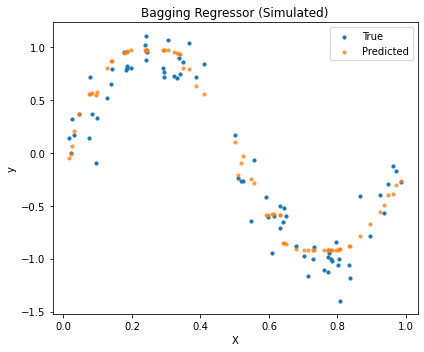

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Simulate data
np.random.seed(42)
X = np.sort(np.random.rand(300, 1), axis=0)
y = np.sin(2 * np.pi * X).ravel() + np.random.normal(0, 0.2, 300)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Define Bagging Regressor
bagging = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=4),
    n_estimators=50,
    bootstrap=True,                   # Typically contains ~63% unique samples (due to resampling with replacement), leaving ~37% out-of-bag (OOB)
    random_state=42
)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)

# Evaluate
print("Bagging R²:", r2_score(y_test, y_pred))
print("Bagging MSE:", mean_squared_error(y_test, y_pred))

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(X_test, y_test, s=10, label="True")
plt.scatter(X_test, y_pred, s=10, label="Predicted", alpha=0.7)
plt.legend()
plt.title("Bagging Regressor (Simulated)")
plt.xlabel("X")
plt.ylabel("y")
plt.tight_layout()
plt.show()


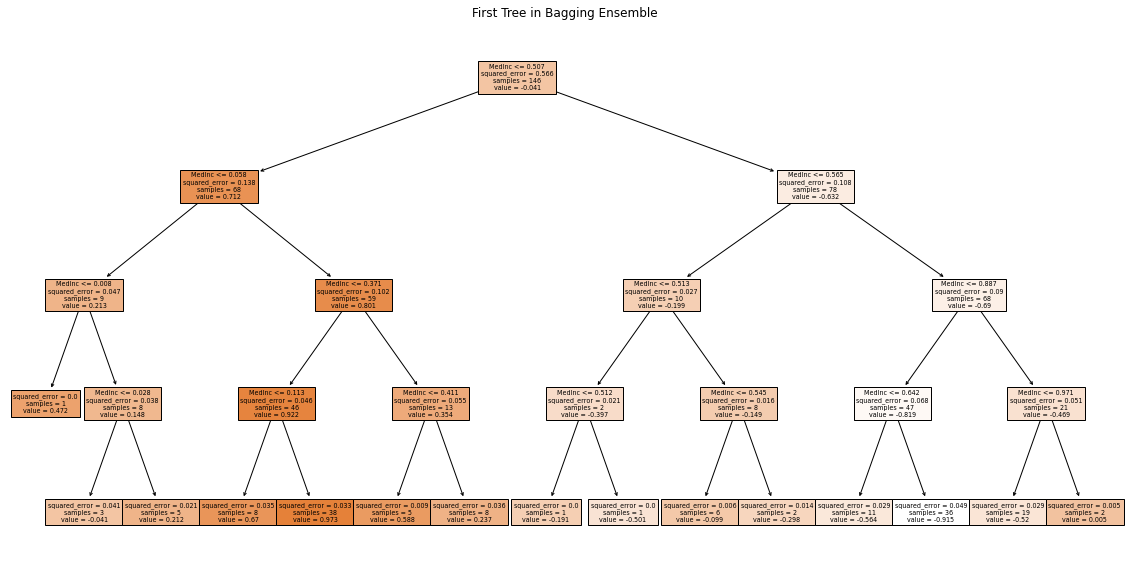

In [7]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(bagging.estimators_[0], max_depth=4, filled=True, feature_names=data.feature_names)
plt.title("First Tree in Bagging Ensemble")
plt.show()

Bagging R² (real): 0.7801026785333183
Bagging MSE (real): 0.290972116986613


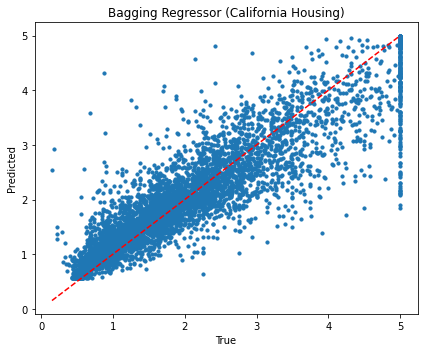

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Load data
data = fetch_california_housing()
X_real = data.data
y_real = data.target

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_real)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_real, random_state=42)

# Bagging model
bagging_real = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=10),
    n_estimators=100,
    bootstrap=True,
    random_state=42
)
bagging_real.fit(X_train, y_train)
y_pred_real = bagging_real.predict(X_test)

# Evaluate
print("Bagging R² (real):", r2_score(y_test, y_pred_real))
print("Bagging MSE (real):", mean_squared_error(y_test, y_pred_real))

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_real, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Bagging Regressor (California Housing)")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.tight_layout()
plt.show()


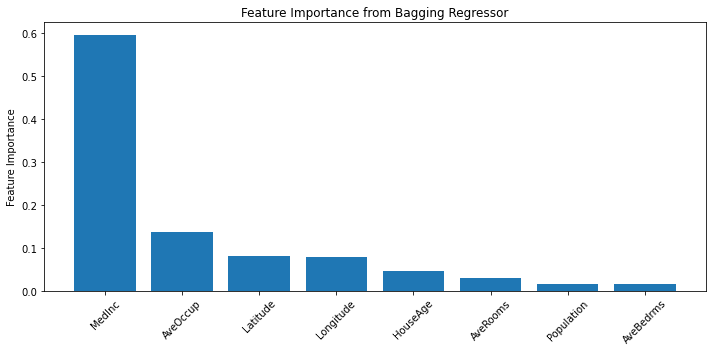

In [10]:
# Load and prepare data
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names  # <- This was missing

# Fit bagging model
bagging = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=10),
    n_estimators=100,
    bootstrap=True,
    random_state=42
)
bagging.fit(X, y)

# Aggregate feature importances
importances = np.mean([tree.feature_importances_ for tree in bagging.estimators_], axis=0)
sorted_idx = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(range(len(importances)), importances[sorted_idx])
plt.xticks(ticks=range(len(importances)), labels=np.array(feature_names)[sorted_idx], rotation=45)
plt.ylabel("Feature Importance")
plt.title("Feature Importance from Bagging Regressor")
plt.tight_layout()
plt.show()